# Gender Probability Calculation Example

This notebook will demonstrate how the CHILDES corpus is read and how gender probabilities are calculated

In [1]:
import pickle
import pylangacq as pla
from os.path import abspath
import matplotlib.pyplot as plt

## Reading the CHILDES Corpus
First, we read the CHILDES data using the pylangacq library

In [2]:
# change this to the relative path to CHIDLES on your computer
CHILDES_PATH = "../../childes/corpora"

# read one conversation with a boy and one with a girl
files_to_read = [CHILDES_PATH + "/Kuczaj/030201.cha", CHILDES_PATH + "/Morisset/UCLA/369m36.cha"]

In [3]:
# initialize dictionaries for lists of words
cds_words = {"male": [], "female": []}
for file_path in files_to_read:
    
    chat = pla.read_chat(file_path)
    
    # get data on the participants of the conversation
    participants = chat.participants()[abspath(file_path)]
    
    child_sex = participants['CHI']['sex']
    
    # add the speech of all non-child speakers to the relevant list
    for p in participants:
        if p != "CHI":
            cds_words[child_sex].extend(chat.words(participant=p))

## Gender Probability Calculation
The variable cds_words now contains two lists: one list of the words said to a male child and another list of the words said to a female child. From here we can compute gender probability.

Gender probability is defined as follows:

$$ p(f|w) = \frac{c(f,w)/c(f)}{c(f,w)/c(f) + c(m,w)/c(m)} $$

Where c(g,w) is the number of times word *w* was said to a child of gender *g*

In [4]:
# make a list of all the words
all_words = list(set(cds_words['male']) | set(cds_words['female']))

# initialize dictionaries to count the word occurrences
word_counts = {"male": {}, "female": {}}
for word in all_words:
    word_counts["male"][word] = 0
    word_counts["female"][word] = 0
    
# count the occurrences of words said to boys and girls in the corpus
for gender in ("male", "female"):
    for word in cds_words[gender]:
        word_counts[gender][word] += 1
        
# compute the total number of words said to male and female children
total_counts = {}
total_counts["male"] = sum([word_counts["male"][word] for word in all_words])
total_counts["female"] = sum([word_counts["female"][word] for word in all_words])

# compute the gender probability of each word
gender_probabilities = {}
for word in all_words:
    gender_probabilities[word] = (word_counts['female'][word] / total_counts["female"]) / \
        ( (word_counts['female'][word] / total_counts["female"]) + (word_counts['male'][word] / total_counts["male"]) )

At this point, a lot of gender probabilities will be either 1 or 0 since we only computed gender probability based on a small subset of the corpus. However, some common words have gender probabilities between 0 and 1. Here are some examples:

In [5]:
gender_probabilities["this"]

0.8770262716601454

In [6]:
gender_probabilities["want"]

0.4044856921887084

So the word "this" was said to girls 87.7% of the time and the word "want" was said to girls 40.4% of the time. Of course, this only uses two transcripts, so it should not be interpreted as indicating a broader trend.

## Visualizing Gender Probabilities

Next, we can plot the gender probabilities of some words along a line. Here is a plot of the gender probabilities of a subset of the words in the transcript we read.

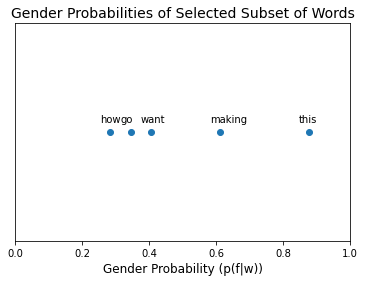

In [7]:
# define a set of words whose gender probabilities to plot
words_to_plot = ["this", "want", "making", "go", "how"]

# set the x and y values for the plot
x_values = [gender_probabilities[w] for w in words_to_plot]
y_values = [0 for _ in words_to_plot]

# create and format the scatterplot
plt.scatter(x_values, y_values)
plt.yticks([])
plt.xlabel("Gender Probability (p(f|w))", fontsize=12)
plt.title("Gender Probabilities of Selected Subset of Words", fontsize=14)
plt.xlim(left=0, right=1)
# add each word
for i in range(len(words_to_plot)):
    plt.text(x_values[i] - 0.03, 0.005, words_to_plot[i])
plt.show()